### Building Basic LeNet for MNIST
    1. Make sure to run the helper functions first

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 86B0-AFDD

 Directory of C:\Users\Baron\Desktop\EE_297_Repo\EE_297\ML_PATH_EE297\EE297_env\projects

04/04/2025  08:26 PM    <DIR>          .
04/04/2025  08:26 PM    <DIR>          ..
04/03/2025  08:07 PM    <DIR>          .ipynb_checkpoints
03/22/2025  11:41 PM    <DIR>          Archive
04/04/2025  08:26 PM            13,076 Lenet Design.ipynb
04/04/2025  08:25 PM            42,485 lenet_model.png
               2 File(s)         55,561 bytes
               4 Dir(s)  181,198,708,736 bytes free


In [2]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\ML_PATH_EE297\\EE297_env\\projects'

In [3]:
# Main Imports
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import numpy as np

C:\Users\Baron\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\Baron\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\Baron\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\Baron\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
C:\Users\Bar

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
tf.keras.backend.set_floatx('float32')
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from ann_visualizer.visualize import ann_viz
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [7]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [8]:
# Preprocess data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

#For Confusion Matrix
y_test_raw = y_test

# Convers the output data to categorical Data.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

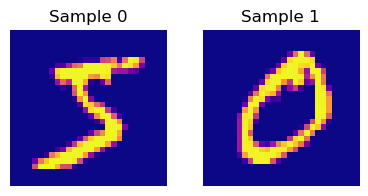

In [9]:
show_sample_images(x_train, 2)

In [10]:
# Build LeNet model with explicit dtype
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(6, 5), activation='relu', input_shape=(28, 28, 1),
                  padding='same', dtype='float32'),
    layers.AveragePooling2D(pool_size=(2, 2), dtype='float32'),
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu', dtype='float32'),
    layers.AveragePooling2D(pool_size=(2, 2), dtype='float32'),
    layers.Flatten(dtype='float32'),
    layers.Dense(120, activation='relu', dtype='float32'),
    layers.Dense(84, activation='relu', dtype='float32'),
    layers.Dense(10, activation='softmax', dtype='float32')
])

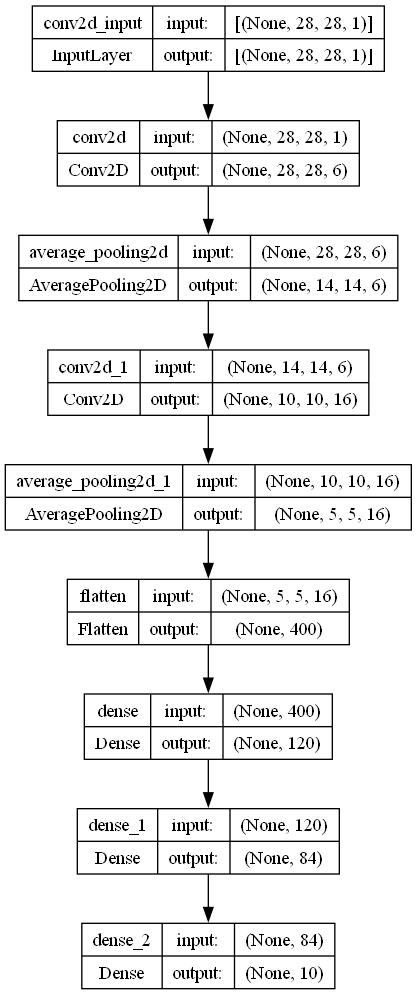

In [11]:
plot_model(model, to_file='lenet_model.png', show_shapes=True, show_layer_names=True)

In [12]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 9s 20ms/step - loss: 0.3874 - accuracy: 0.8879 - val_loss: 0.1428 - val_accuracy: 0.9578
Epoch 2/10
422/422 [==============================] - 8s 19ms/step - loss: 0.1173 - accuracy: 0.9637 - val_loss: 0.0909 - val_accuracy: 0.9750
Epoch 3/10
422/422 [==============================] - 8s 19ms/step - loss: 0.0866 - accuracy: 0.9738 - val_loss: 0.0846 - val_accuracy: 0.9763
Epoch 4/10
422/422 [==============================] - 8s 20ms/step - loss: 0.0699 - accuracy: 0.9792 - val_loss: 0.0574 - val_accuracy: 0.9840
Epoch 5/10
422/422 [==============================] - 8s 20ms/step - loss: 0.0595 - accuracy: 0.9814 - val_loss: 0.0555 - val_accuracy: 0.9827
Epoch 6/10
422/422 [==============================] - 8s 19ms/step - loss: 0.0508 - accuracy: 0.9842 - val_loss: 0.0542 - val_accuracy: 0.9847
Epoch 7/10
422/422 [==============================] - 8s 19ms/step - loss: 0.0427 - accuracy: 0.9871 - val_loss: 0.0526 - val_accuracy: 0.9865

In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0507 - accuracy: 0.9839
Test accuracy: 0.9839


313/313 [==============================] - 1s 4ms/step


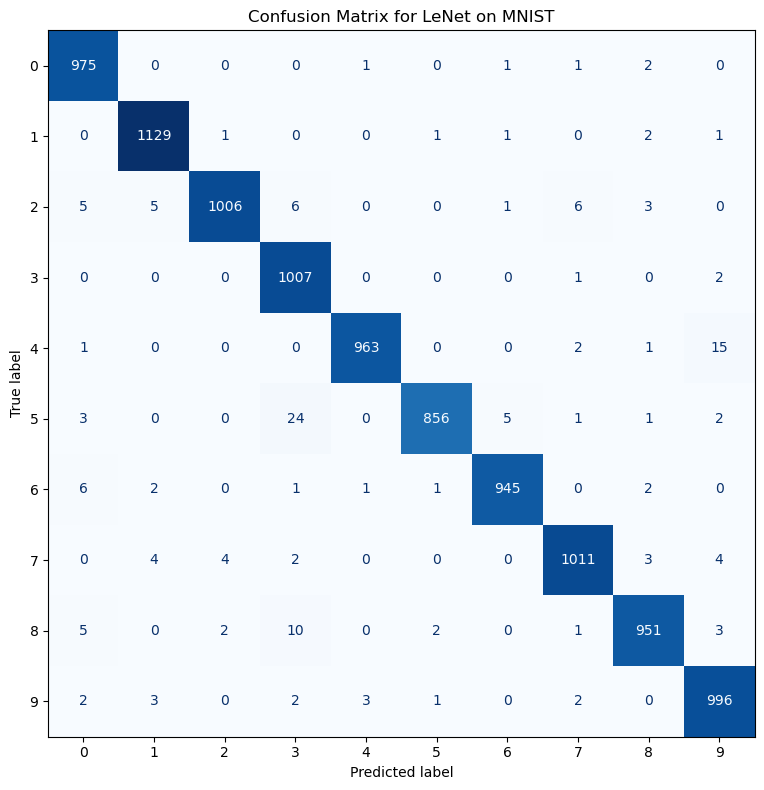

In [15]:
#Confusion Matrix
# Predict on test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Use y_test (not y_test_cat) for the confusion matrix
cm = confusion_matrix(y_test_raw, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

# Display it
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix for LeNet on MNIST")
plt.tight_layout()
plt.show()

In [16]:
for layer in model.layers:
    has_weights = "✅" if layer.get_weights() else "❌"
    print(f"{layer.name:20s} | Has weights? {has_weights}")

conv2d               | Has weights? ✅
average_pooling2d    | Has weights? ❌
conv2d_1             | Has weights? ✅
average_pooling2d_1  | Has weights? ❌
flatten              | Has weights? ❌
dense                | Has weights? ✅
dense_1              | Has weights? ✅
dense_2              | Has weights? ✅


In [17]:
# Extract The Weights
x = 0
for layer in model.layers:
    if layer.get_weights():
        print(x)
        w, b = layer.get_weights()
        print(f"{layer.name} weights shape: {w.shape}")
        print(f"{layer.name} biases shape: {b.shape}")
        x+=1

0
conv2d weights shape: (6, 5, 1, 6)
conv2d biases shape: (6,)
1
conv2d_1 weights shape: (5, 5, 6, 16)
conv2d_1 biases shape: (16,)
2
dense weights shape: (400, 120)
dense biases shape: (120,)
3
dense_1 weights shape: (120, 84)
dense_1 biases shape: (84,)
4
dense_2 weights shape: (84, 10)
dense_2 biases shape: (10,)


In [18]:

#layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1), padding='same', dtype='float32')
weights = model.get_weights()
conv1_weights = weights[0]
conv1_biases = weights[1]

conv2_weights = weights[2]
conv2_biases = weights[3]

fc1_weights = weights[4]
fc1_biases = weights[5]

fc2_weights = weights[6]
fc2_biases = weights[7]

fc3_weights = weights[8]
fc3_biases = weights[9]

print(conv1_weights)

[[[[ 0.11154223  0.00786229 -0.20131132  0.18761289  0.04364257
    -0.00108072]]

  [[-0.0538785  -0.14031523 -0.15911171  0.23230861  0.00946954
    -0.05221906]]

  [[ 0.02367545  0.1003456  -0.33413523  0.19657618 -0.0634345
    -0.01735696]]

  [[ 0.12160367  0.01895132 -0.2302847  -0.08105885  0.17239828
     0.01700008]]

  [[-0.10442436  0.0169801  -0.01127857 -0.22680247  0.05543911
     0.06501129]]]


 [[[ 0.08047222  0.10851416  0.22166547  0.21139495 -0.08819008
    -0.04998778]]

  [[ 0.16972843  0.18182415  0.07300346  0.30946007  0.33975035
    -0.00477588]]

  [[ 0.13805762  0.13009632 -0.07071727  0.11868576  0.35942957
     0.06903219]]

  [[-0.03799424  0.310923   -0.10501004 -0.11984088  0.09575165
     0.15701026]]

  [[ 0.13181591  0.29566523 -0.05098244 -0.33152837  0.07174651
     0.06016716]]]


 [[[ 0.12565792  0.16519834  0.30375224  0.08229209  0.33213955
     0.13971047]]

  [[ 0.13320558  0.12782538  0.34468055  0.2506632   0.32424778
     0.29858324]]

 

In [41]:
## Convert the current img to normalized text file values 
from PIL import Image
import numpy as np

img_5 = Image.open("C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\ML_PATH_EE297\\EE297_env\\pictures\\img_5.jpg").convert("L").resize((28, 28))
arr = np.asarray(img).astype('float32') / 255.0
# Save as a flat .txt file
arr.tofile("img_5.txt", sep="\n", format="%.6f")

In [51]:
#Convert the current weights and biases to header files for HLS env
import numpy as np

# Load trained weights
conv1_weights = weights[0]  # shape: (6, 5, 1, 6)
conv1_biases = weights[1]   # shape: (6,)

# Export as C header
with open("conv1_weights.h", "w") as f:
    f.write("float conv1_weights[6][5][1][6] = {\n")
    for i in range(6):
        f.write("  {\n")
        for j in range(5):
            f.write("    {")
            f.write(", ".join(f"{conv1_weights[i][j][0][k]:.8f}" for k in range(6)))
            f.write("},\n")
        f.write("  },\n")
    f.write("};\n")

with open("conv1_biases.h", "w") as f:
    f.write("float conv1_biases[6] = {")
    f.write(", ".join(f"{b:.8f}" for b in conv1_biases))
    f.write("};\n")

### Helper Functions

In [5]:
def show_sample_images(x_data, n=5):
    """
    Display the first `n` images in the dataset as heatmaps.
    
    Args:
        x_data (numpy.ndarray): The dataset (e.g., x_train).
        n (int): Number of images to display (default 5).
    """
    plt.figure(figsize=(n * 2, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(x_data[i].squeeze(), cmap='plasma')  # squeeze in case shape is (28, 28, 1)
        plt.axis('off')
        plt.title(f"Sample {i}")
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def draw_full_lenet_neuron_diagram():
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_xlim(0, 18)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # Full neuron counts for each major layer
    layers = [
        {"label": "Input Layer\n28x28", "x": 1, "neurons": 10},
        {"label": "Conv2D\n6@28x28", "x": 3, "neurons": 6},
        {"label": "AvgPool\n6@14x14", "x": 4.5, "neurons": 6},
        {"label": "Conv2D\n16@10x10", "x": 6, "neurons": 8},
        {"label": "AvgPool\n16@5x5", "x": 7.5, "neurons": 8},
        {"label": "Flatten\n400", "x": 9, "neurons": 10},
        {"label": "Dense\n120", "x": 11, "neurons": 10},
        {"label": "Dense\n84", "x": 13, "neurons": 10},
        {"label": "Output\n10", "x": 15, "neurons": 10}
    ]

    # Draw neurons
    for layer in layers:
        x = layer["x"]
        n = layer["neurons"]
        spacing = 8.0 / max(n, 1)
        offset = (10 - (n * spacing)) / 2
        for i in range(n):
            y = 9 - (i * spacing + offset)
            circle = plt.Circle((x, y), 0.25, color='white', ec='black', zorder=3)
            ax.add_patch(circle)

        # Label each layer
        ax.text(x, 9.5, layer["label"], ha='center', fontsize=10, fontweight='bold')

    # Draw full connections (dense) between adjacent layers
    for i in range(len(layers) - 1):
        x1, n1 = layers[i]["x"], layers[i]["neurons"]
        x2, n2 = layers[i+1]["x"], layers[i+1]["neurons"]
        spacing1 = 8.0 / max(n1, 1)
        spacing2 = 8.0 / max(n2, 1)
        offset1 = (10 - (n1 * spacing1)) / 2
        offset2 = (10 - (n2 * spacing2)) / 2
        for j in range(n1):
            y1 = 9 - (j * spacing1 + offset1)
            for k in range(n2):
                y2 = 9 - (k * spacing2 + offset2)
                ax.plot([x1 + 0.25, x2 - 0.25], [y1, y2], 'gray', linewidth=0.3, zorder=1)

    plt.title("LeNet Architecture — Full Neuron-Level Visualization", fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def visualize_conv2d_operation():
    fig, ax = plt.subplots(figsize=(28, 28))

    # Create a fake 8x8 input image
    input_image = np.arange(784).reshape(28, 28)

    # Simulated 5x5 filter kernel (not showing values, just visualization)
    filter_size = 5
    stride = 1
    start_x, start_y = 1, 1  # where the filter is "sliding" over

    ax.imshow(input_image, cmap='gray', alpha=0.5)

    # Draw the filter sliding position (5x5 square)
    rect = patches.Rectangle((start_y-0.5, start_x-0.5), filter_size, filter_size, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Annotate pixels
    for i in range(28):
        for j in range(28):
            ax.text(j, i, str(input_image[i, j]), ha='center', va='center', fontsize=8)

    ax.set_title("Example: A 5x5 Filter Sliding Over an 8x8 Image")
    ax.axis('off')
    plt.tight_layout()
    plt.show()

visualize_conv2d_operation()
